In [1]:
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split

X, y = make_moons(n_samples=1000, noise=0.3, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [5]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

bag_clf = BaggingClassifier(DecisionTreeClassifier(), n_estimators=500, max_samples=100, n_jobs=-1, random_state=42)
bag_clf.fit(X_train, y_train)


,estimator,DecisionTreeClassifier()
,n_estimators,500
,max_samples,100
,max_features,1.0
,bootstrap,True
,bootstrap_features,False
,oob_score,False
,warm_start,False
,n_jobs,-1
,random_state,42
,verbose,0


In [7]:
from sklearn.metrics import accuracy_score

y_pred = bag_clf.predict(X_test)
accuracy_score(y_test, y_pred)

0.916

In [31]:
import numpy as np
import matplotlib.pyplot as plt


def plot_decision_boundary(clf, X, y, alpha=0.1):
	axes = [-1.5, 2.4, -1, 1.5]

	x1, x2 = np.meshgrid(
		np.linspace(axes[0], axes[1], 100),
		np.linspace(axes[2], axes[3], 100)
	)
	X_new = np.c_[x1.ravel(), x2.ravel()]
	y_pred = clf.predict(X_new).reshape(x1.shape)

	plt.contourf(x1, x2, y_pred, alpha=0.3 * alpha, cmap='gist_rainbow_r')
	plt.contour(x1, x2, y_pred, cmap="Greys", alpha=0.8 * alpha)
	colors = ["#78705c", "#c47b27"]
	markers = ("o", "^")
	for idx in (0, 1):
		plt.plot(X[:, 0][y == idx], X[:, 1][y == idx],
				 color=colors[idx], marker=markers[idx], linestyle="none")
	plt.axis(axes)
	plt.xlabel(r"$x_1$")
	plt.ylabel(r"$x_2$", rotation=0)

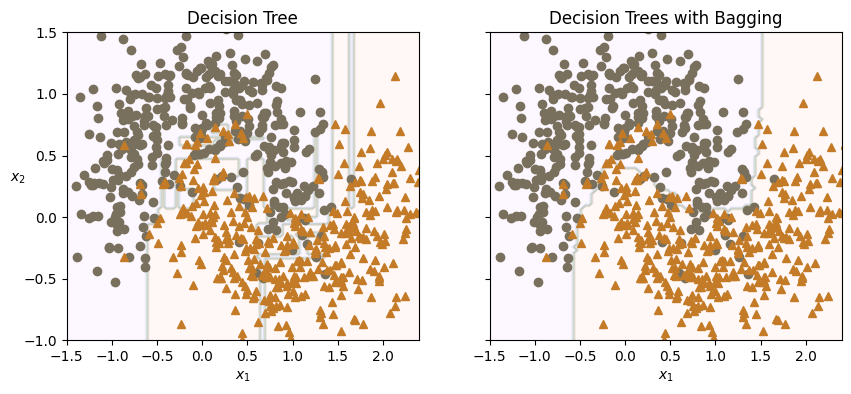

In [32]:
tree_clf = DecisionTreeClassifier(random_state=42)
tree_clf.fit(X_train,y_train)

fig, axes = plt.subplots(ncols=2, figsize=(10, 4), sharey=True)
plt.sca(axes[0])
plot_decision_boundary(tree_clf, X_train, y_train)
plt.title("Decision Tree")
plt.sca(axes[1])
plot_decision_boundary(bag_clf, X_train, y_train)
plt.title("Decision Trees with Bagging")
plt.ylabel("")
plt.show()